### Importing dataset

In [1]:
import pandas as pd
df=pd.read_csv("Downloads/Titanic.csv")

In [2]:
df.head()

,survived,pclass,age,sibsp,parch,fare,male,age_was_missing,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton
0,0,3,22.0,1,0,7.2500,1,False,0,0,1
1,1,1,38.0,1,0,71.2833,0,False,1,0,0
2,1,3,26.0,0,0,7.9250,0,False,0,0,1
3,1,1,35.0,1,0,53.1000,0,False,0,0,1
4,0,3,35.0,0,0,8.0500,1,False,0,0,1


In [3]:
df.shape

(891, 11)

In [4]:
df.describe()

,survived,pclass,age,sibsp,parch,fare,male,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,0.188552,0.086420,0.722783
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990,0.391372,0.281141,0.447876
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000


### Checking for Null values

In [5]:
for col in df.columns:
    print(col + " - " + str(df[col].isnull().values.any()))

survived - False
pclass - False
age - False
sibsp - False
parch - False
fare - False
male - False
age_was_missing - False
embarked_from_cherbourg - False
embarked_from_queenstown - False
embarked_from_southampton - False


In [6]:
# From the above output we can see that there are no null values
# So, there is no need to drop any row or column 

### Histograms

In [7]:
import matplotlib.pyplot as plt

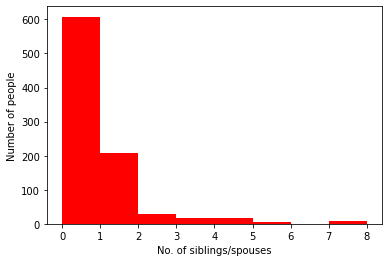

In [8]:
plt.hist(df["sibsp"], bins=8, color="red")
plt.xlabel("No. of siblings/spouses")
plt.ylabel("Number of people")
plt.show()

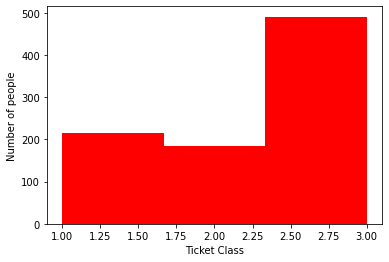

In [9]:
plt.hist(df["pclass"], bins=3, color="red")
plt.xlabel("Ticket Class")
plt.ylabel("Number of people")
plt.show()

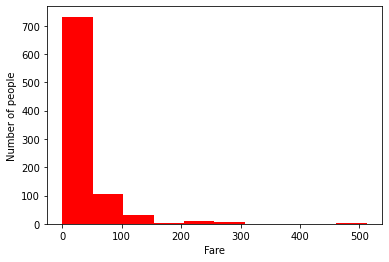

In [10]:
plt.hist(df["fare"], color="red")
plt.xlabel("Fare")
plt.ylabel("Number of people")
plt.show()

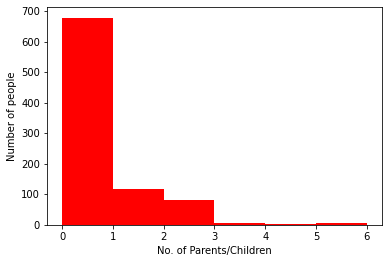

In [11]:
plt.hist(df["parch"], bins=6, color="red")
plt.xlabel("No. of Parents/Children")
plt.ylabel("Number of people")
plt.show()

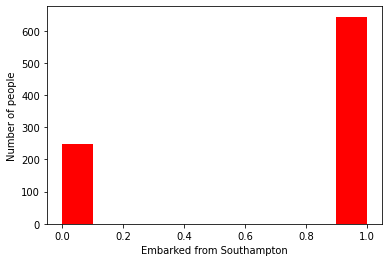

In [12]:
plt.hist(df["embarked_from_southampton"], color="red")
plt.xlabel("Embarked from Southampton")
plt.ylabel("Number of people")
plt.show()

### Boxplot

<AxesSubplot:>

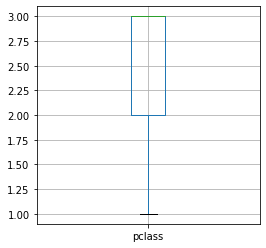

In [13]:
plt.figure(figsize=(4,4))
df[["pclass"]].boxplot()

<AxesSubplot:>

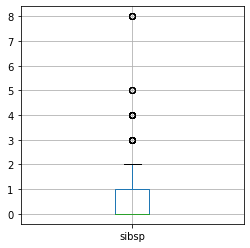

In [14]:
plt.figure(figsize=(4,4))
df[["sibsp"]].boxplot()

<AxesSubplot:>

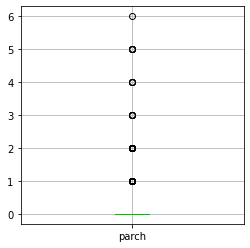

In [15]:
plt.figure(figsize=(4,4))
df[["parch"]].boxplot()

<AxesSubplot:>

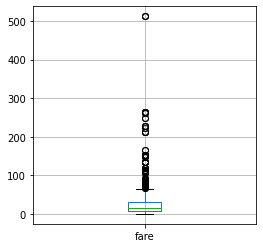

In [16]:
plt.figure(figsize=(4,4))
df[["fare"]].boxplot()

<AxesSubplot:>

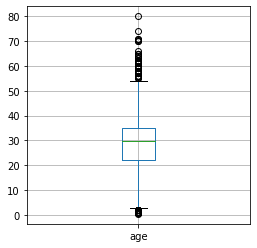

In [17]:
plt.figure(figsize=(4,4))
df[["age"]].boxplot()

### Scatter Plot

Text(0, 0.5, 'Fare')

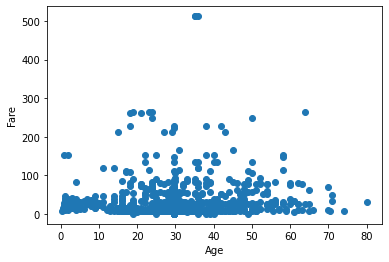

In [18]:
plt.scatter(df["age"], df["fare"])
plt.xlabel("Age")
plt.ylabel("Fare")

Text(0, 0.5, 'Fare')

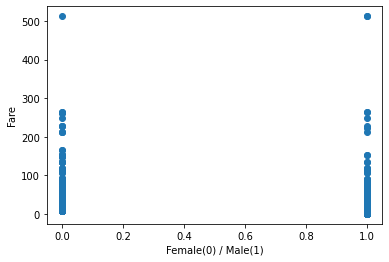

In [19]:
plt.scatter(df["male"], df["fare"])
plt.xlabel("Female(0) / Male(1)")
plt.ylabel("Fare")

Text(0, 0.5, 'Age')

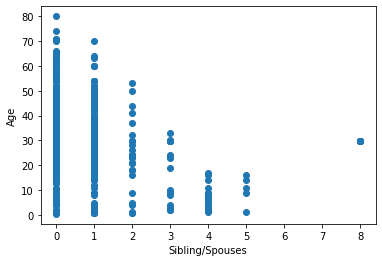

In [20]:
plt.scatter(df["sibsp"], df["age"])
plt.xlabel("Sibling/Spouses")
plt.ylabel("Age")

Text(0, 0.5, 'Age')

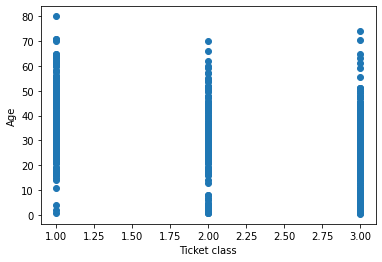

In [21]:
plt.scatter(df["pclass"], df["age"])
plt.xlabel("Ticket class")
plt.ylabel("Age")

Text(0, 0.5, 'Fare')

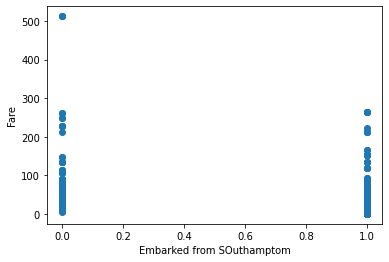

In [22]:
plt.scatter(df["embarked_from_southampton"], df["fare"])
plt.xlabel("Embarked from SOuthamptom")
plt.ylabel("Fare")

### Dimensionality Reduction

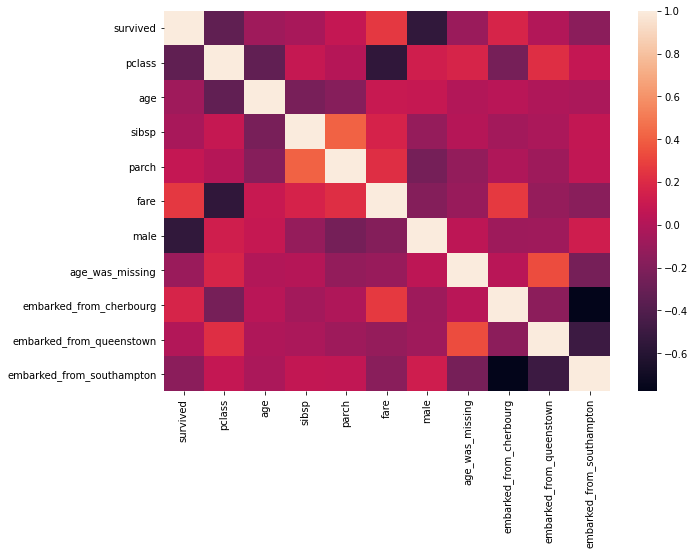

In [23]:
import seaborn as sns
cor = df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(cor)
plt.show()

In [24]:
# From the above matrix we see that there are no values having value greater than the threshold
# So, there is no need to disturb the data 

### Extraction

In [25]:
x=df.drop(['survived', 'age_was_missing'], axis=1)
y=df['survived']

### Splitting

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
x=scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, stratify=y)

### Modelling 

### 1. KNN classsification

In [27]:
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier()
model1.fit(x_train, y_train)
print("Accuracy = " + str(model1.score(x_test, y_test)))
model1.predict(x_test)

Accuracy = 0.835820895522388


array([0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1], dtype=int64)

### 2. Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
model2.fit(x_train, y_train)
print("Accuracy = " + str(model2.score(x_test, y_test)))
model2.predict(x_test)

Accuracy = 0.8022388059701493


array([0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1], dtype=int64)

### 3. Decision Tree Classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier()
model3.fit(x_train, y_train)
print("Accuracy = " + str(model3.score(x_test, y_test)))
model3.predict(x_test)

Accuracy = 0.7835820895522388


array([0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1], dtype=int64)

### 4. Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier()
model4.fit(x_train, y_train)
print("Accuracy = " + str(model4.score(x_test, y_test)))
model4.predict(x_test)

Accuracy = 0.8283582089552238


array([0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1], dtype=int64)